In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve


from tensorflow import keras
from keras.models import Sequential # sequential networks= all the layers are one after the others
from keras.layers import Dense # we have flat layes 
from scikeras.wrappers import KerasClassifier

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import l2, l1
from keras.layers import Dropout
from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import l2, l1
from keras.layers import Dropout
from keras.regularizers import l2, l1
from keras.models import load_model

In [3]:
#Read datasets
df_train=pd.read_csv("../Dataset_prepared/Prepared_train.csv")
df_test=pd.read_csv("../Dataset_prepared/Prepared_test.csv")

#Drop useless features
df_train.drop('actor',axis=1,inplace=True)
df_train.drop('filename',axis=1,inplace=True)
df_test.drop('actor',axis=1,inplace=True)
df_test.drop('filename',axis=1,inplace=True)

#LabelEncode categorical features
le=preprocessing.LabelEncoder()
c = df_train.select_dtypes(include=['object']).columns.tolist()
for i in c:
    df_train[i]=le.fit_transform(df_train[i])

for i in c:
    df_test[i]=le.fit_transform(df_test[i])

#Normalize pure numeric features 
scaler = StandardScaler()
numeric_features = [n for n in df_train.columns if n!="emotion" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and n!="filename" and n!="actor"]
scaled_features = scaler.fit_transform(df_train[numeric_features])
df_train[numeric_features] = scaled_features
scaled_features_test = scaler.transform(df_test[numeric_features])
df_test[numeric_features] = scaled_features_test

#Set X_train,y_train = data to fit models. Set X_test,y_test = data to test models.
col=[x for x in df_train.columns if x!="emotion"]
X_train=df_train[col].values
y_train = np.array(df_train["emotion"])
X_test=df_test[col].values
y_test = np.array(df_test["emotion"])

In [ ]:
n_classes = 8
def build_model1():
    n_feature = X_train.shape[1] # numero colonne
    model = Sequential()
    model.add(Dense(512, input_dim=n_feature, activation='relu')) 
    model.add(Dense(64, activation='relu'))# second layer
    model.add(Dense(n_classes, activation='softmax'))
    # if we have multiclass u have to specify as output the number of classes
    model.compile(loss='sparse_categorical_crossentropy', # compile=build the network. if binary classification use binary_crossentropy as loss fucntions
                  optimizer="adam", metrics=['accuracy']) # metric u want to observe -> typically accuracy,f1 score
    return model

n_classes = 8
def build_model2():
    n_feature = X_train.shape[1] # numero colonne
    model = Sequential()
    model.add(Dense(512, input_dim=n_feature, activation='tanh')) 
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    # if we have multiclass u have to specify as output the number of classes
    model.compile(loss='sparse_categorical_crossentropy', # compile=build the network. if binary classification use binary_crossentropy as loss fucntions
                  optimizer="adam", metrics=['accuracy']) # metric u want to observe -> typically accuracy,f1 score
    return model

n_classes = 8
def build_model3():
    n_feature = X_train.shape[1] # numero colonne
    model = Sequential()
    model.add(Dense(1024, input_dim=n_feature, activation='tanh')) 
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    # if we have multiclass u have to specify as output the number of classes
    model.compile(loss='sparse_categorical_crossentropy', # compile=build the network. if binary classification use binary_crossentropy as loss fucntions
                  optimizer="adam", metrics=['accuracy']) # metric u want to observe -> typically accuracy,f1 score
    return model

n_classes = 8
def build_model4():
    n_feature = X_train.shape[1] # numero colonne
    model = Sequential()
    model.add(Dense(512, input_dim=n_feature, activation='relu')) 
    model.add(Dense(512, activation='relu'))# second layer
    model.add(Dense(n_classes, activation='softmax'))
    # if we have multiclass u have to specify as output the number of classes
    model.compile(loss='sparse_categorical_crossentropy', # compile=build the network. if binary classification use binary_crossentropy as loss fucntions
                  optimizer="adam", metrics=['accuracy']) # metric u want to observe -> typically accuracy,f1 score
    return model

n_classes = 8
def build_model5():
    n_feature = X_train.shape[1] # numero colonne
    model = Sequential()
    model.add(Dense(512, input_dim=n_feature, activation='relu')) 
    model.add(Dense(n_feature, activation='relu'))# second layer
    model.add(Dense(n_classes, activation='softmax'))
    # if we have multiclass u have to specify as output the number of classes
    model.compile(loss='sparse_categorical_crossentropy', # compile=build the network. if binary classification use binary_crossentropy as loss fucntions
                  optimizer="adam", metrics=['accuracy']) # metric u want to observe -> typically accuracy,f1 score
    return model

In [ ]:
clf1=KerasClassifier(build_fn=build_model1)
clf2=KerasClassifier(build_fn=build_model2)
clf3=KerasClassifier(build_fn=build_model3)
clf4=KerasClassifier(build_fn=build_model4)
clf5=KerasClassifier(build_fn=build_model5)

print("Train Model1")
history1=clf1.fit(X_train, y_train,validation_split=0.1,epochs=50, batch_size=30).history_
print("Train Model2")
history2=clf2.fit(X_train, y_train,validation_split=0.1,epochs=50, batch_size=30).history_
print("Train Model3")
history3=clf3.fit(X_train, y_train,validation_split=0.1,epochs=50, batch_size=30).history_
print("Train Model4")
history4=clf4.fit(X_train, y_train,validation_split=0.1,epochs=50, batch_size=30).history_
print("Train Model5")
history5=clf5.fit(X_train, y_train,validation_split=0.1,epochs=50, batch_size=30).history_

Train Model1
Epoch 1/50


d:\Anaconda\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


55/55 [==============================] - 1s 3ms/step - loss: 1.5567 - accuracy: 0.4134 - val_loss: 1.4825 - val_accuracy: 0.4044
Epoch 2/50
55/55 [==============================] - 0s 1ms/step - loss: 1.0170 - accuracy: 0.6310 - val_loss: 1.5526 - val_accuracy: 0.4426
Epoch 3/50
55/55 [==============================] - 0s 1ms/step - loss: 0.7715 - accuracy: 0.7258 - val_loss: 1.6579 - val_accuracy: 0.4426
Epoch 4/50
55/55 [==============================] - 0s 1ms/step - loss: 0.5852 - accuracy: 0.8067 - val_loss: 1.8322 - val_accuracy: 0.4645
Epoch 5/50
55/55 [==============================] - 0s 1ms/step - loss: 0.4984 - accuracy: 0.8249 - val_loss: 1.8727 - val_accuracy: 0.4645
Epoch 6/50
55/55 [==============================] - 0s 1ms/step - loss: 0.3807 - accuracy: 0.8869 - val_loss: 1.7778 - val_accuracy: 0.4973
Epoch 7/50
55/55 [==============================] - 0s 1ms/step - loss: 0.2604 - accuracy: 0.9398 - val_loss: 1.9690 - val_accuracy: 0.4754
Epoch 8/50
55/55 [=============

d:\Anaconda\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


55/55 [==============================] - 1s 3ms/step - loss: 1.7102 - accuracy: 0.3064 - val_loss: 1.7033 - val_accuracy: 0.3716
Epoch 2/50
55/55 [==============================] - 0s 1ms/step - loss: 1.2556 - accuracy: 0.5100 - val_loss: 1.5711 - val_accuracy: 0.3770
Epoch 3/50
55/55 [==============================] - 0s 1ms/step - loss: 0.9870 - accuracy: 0.6249 - val_loss: 1.6867 - val_accuracy: 0.3825
Epoch 4/50
55/55 [==============================] - 0s 1ms/step - loss: 0.7749 - accuracy: 0.7021 - val_loss: 1.8540 - val_accuracy: 0.4426
Epoch 5/50
55/55 [==============================] - 0s 1ms/step - loss: 0.6074 - accuracy: 0.7793 - val_loss: 2.0167 - val_accuracy: 0.4481
Epoch 6/50
55/55 [==============================] - 0s 1ms/step - loss: 0.4712 - accuracy: 0.8249 - val_loss: 2.0628 - val_accuracy: 0.4044
Epoch 7/50
55/55 [==============================] - 0s 1ms/step - loss: 0.3568 - accuracy: 0.8772 - val_loss: 2.2597 - val_accuracy: 0.4481
Epoch 8/50
55/55 [=============

d:\Anaconda\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


55/55 [==============================] - 2s 17ms/step - loss: 1.8245 - accuracy: 0.2571 - val_loss: 1.9366 - val_accuracy: 0.2623
Epoch 2/50
55/55 [==============================] - 1s 15ms/step - loss: 1.6327 - accuracy: 0.3131 - val_loss: 1.7318 - val_accuracy: 0.3333
Epoch 3/50
55/55 [==============================] - 1s 15ms/step - loss: 1.5227 - accuracy: 0.3799 - val_loss: 1.6827 - val_accuracy: 0.3005
Epoch 4/50
55/55 [==============================] - 1s 15ms/step - loss: 1.4941 - accuracy: 0.4024 - val_loss: 1.6429 - val_accuracy: 0.2896
Epoch 5/50
55/55 [==============================] - 1s 15ms/step - loss: 1.4065 - accuracy: 0.4328 - val_loss: 1.6933 - val_accuracy: 0.3279
Epoch 6/50
55/55 [==============================] - 1s 15ms/step - loss: 1.3378 - accuracy: 0.4456 - val_loss: 1.7392 - val_accuracy: 0.3880
Epoch 7/50
55/55 [==============================] - 1s 15ms/step - loss: 1.2931 - accuracy: 0.4790 - val_loss: 1.7291 - val_accuracy: 0.3989
Epoch 8/50
55/55 [======

d:\Anaconda\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


55/55 [==============================] - 1s 4ms/step - loss: 1.5001 - accuracy: 0.4243 - val_loss: 1.4692 - val_accuracy: 0.4536
Epoch 2/50
55/55 [==============================] - 0s 2ms/step - loss: 0.9486 - accuracy: 0.6426 - val_loss: 1.5158 - val_accuracy: 0.4754
Epoch 3/50
55/55 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.7562 - val_loss: 1.7337 - val_accuracy: 0.4481
Epoch 4/50
55/55 [==============================] - 0s 3ms/step - loss: 0.5011 - accuracy: 0.8334 - val_loss: 2.0900 - val_accuracy: 0.4754
Epoch 5/50
55/55 [==============================] - 0s 3ms/step - loss: 0.3447 - accuracy: 0.8954 - val_loss: 1.8907 - val_accuracy: 0.4863
Epoch 6/50
55/55 [==============================] - 0s 3ms/step - loss: 0.2345 - accuracy: 0.9313 - val_loss: 2.5604 - val_accuracy: 0.4699
Epoch 7/50
55/55 [==============================] - 0s 3ms/step - loss: 0.1993 - accuracy: 0.9410 - val_loss: 2.5922 - val_accuracy: 0.4317
Epoch 8/50
55/55 [=============

d:\Anaconda\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


55/55 [==============================] - 1s 3ms/step - loss: 1.5201 - accuracy: 0.4116 - val_loss: 1.6410 - val_accuracy: 0.3934
Epoch 2/50
55/55 [==============================] - 0s 1ms/step - loss: 0.9412 - accuracy: 0.6571 - val_loss: 1.6349 - val_accuracy: 0.4481
Epoch 3/50
55/55 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.7574 - val_loss: 1.7978 - val_accuracy: 0.4262
Epoch 4/50
55/55 [==============================] - 0s 1ms/step - loss: 0.5035 - accuracy: 0.8334 - val_loss: 1.8133 - val_accuracy: 0.4973
Epoch 5/50
55/55 [==============================] - 0s 1ms/step - loss: 0.3507 - accuracy: 0.8948 - val_loss: 2.0247 - val_accuracy: 0.4536
Epoch 6/50
55/55 [==============================] - 0s 1ms/step - loss: 0.2473 - accuracy: 0.9295 - val_loss: 2.1357 - val_accuracy: 0.4590
Epoch 7/50
55/55 [==============================] - 0s 1ms/step - loss: 0.1832 - accuracy: 0.9483 - val_loss: 2.1986 - val_accuracy: 0.4809
Epoch 8/50
55/55 [=============

In [12]:
y_pred1=clf1.predict(X_test).astype(int)
print(classification_report(y_test, y_pred1))

20/20 [==============================] - 0s 579us/step
              precision    recall  f1-score   support

           0       0.54      0.75      0.63        96
           1       0.52      0.64      0.57        96
           2       0.52      0.58      0.55        48
           3       0.58      0.36      0.45        96
           4       0.46      0.43      0.44        96
           5       0.38      0.38      0.38        48
           6       0.41      0.31      0.35        96
           7       0.47      0.48      0.47        48

    accuracy                           0.49       624
   macro avg       0.48      0.49      0.48       624
weighted avg       0.49      0.49      0.48       624



In [13]:
y_pred2=clf2.predict(X_test).astype(int)
print(classification_report(y_test, y_pred2))

20/20 [==============================] - 0s 632us/step
              precision    recall  f1-score   support

           0       0.55      0.78      0.64        96
           1       0.56      0.65      0.60        96
           2       0.45      0.56      0.50        48
           3       0.59      0.43      0.49        96
           4       0.44      0.38      0.40        96
           5       0.38      0.38      0.38        48
           6       0.40      0.30      0.35        96
           7       0.53      0.50      0.52        48

    accuracy                           0.50       624
   macro avg       0.49      0.50      0.49       624
weighted avg       0.50      0.50      0.49       624



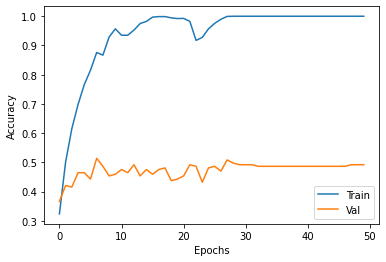

In [23]:
plt.plot(history2['accuracy'], label='Train')
plt.plot(history2['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

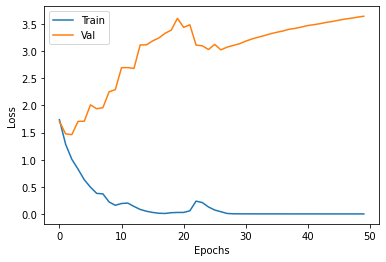

In [24]:
plt.plot(history2['loss'], label='Train')
plt.plot(history2['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
y_pred3=clf3.predict(X_test).astype(int)
print(classification_report(y_test, y_pred3))

20/20 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.53      0.80      0.64        96
           1       0.67      0.35      0.46        96
           2       0.53      0.54      0.54        48
           3       0.43      0.47      0.45        96
           4       0.44      0.31      0.37        96
           5       0.45      0.35      0.40        48
           6       0.41      0.62      0.49        96
           7       0.48      0.21      0.29        48

    accuracy                           0.48       624
   macro avg       0.49      0.46      0.45       624
weighted avg       0.49      0.48      0.46       624



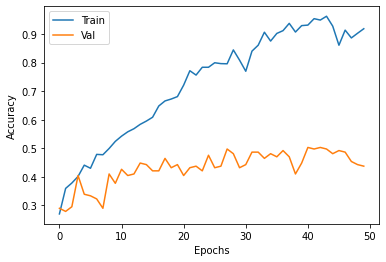

In [25]:
plt.plot(history3['accuracy'], label='Train')
plt.plot(history3['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

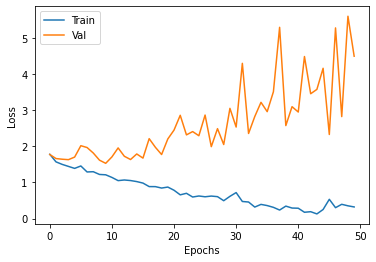

In [26]:
plt.plot(history3['loss'], label='Train')
plt.plot(history3['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
y_pred4=clf4.predict(X_test).astype(int)
print(classification_report(y_test, y_pred4))

20/20 [==============================] - 0s 658us/step
              precision    recall  f1-score   support

           0       0.57      0.77      0.66        96
           1       0.56      0.69      0.62        96
           2       0.50      0.56      0.53        48
           3       0.60      0.38      0.46        96
           4       0.43      0.48      0.46        96
           5       0.39      0.38      0.38        48
           6       0.47      0.34      0.40        96
           7       0.57      0.50      0.53        48

    accuracy                           0.52       624
   macro avg       0.51      0.51      0.50       624
weighted avg       0.52      0.52      0.51       624



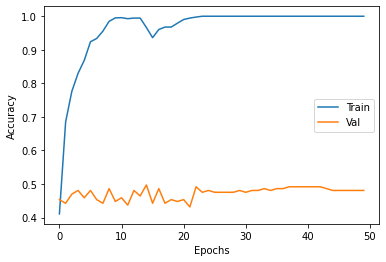

In [27]:
plt.plot(history4['accuracy'], label='Train')
plt.plot(history4['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

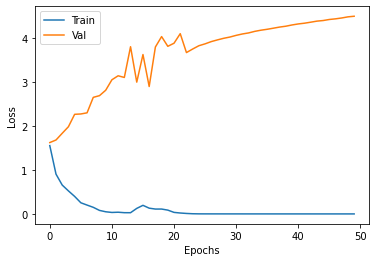

In [28]:
plt.plot(history4['loss'], label='Train')
plt.plot(history4['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
y_pred5=clf5.predict(X_test).astype(int)
print(classification_report(y_test, y_pred5))

20/20 [==============================] - 0s 632us/step
              precision    recall  f1-score   support

           0       0.55      0.75      0.63        96
           1       0.54      0.64      0.58        96
           2       0.54      0.67      0.60        48
           3       0.66      0.42      0.51        96
           4       0.47      0.45      0.46        96
           5       0.44      0.50      0.47        48
           6       0.44      0.30      0.36        96
           7       0.50      0.50      0.50        48

    accuracy                           0.52       624
   macro avg       0.52      0.53      0.51       624
weighted avg       0.52      0.52      0.51       624



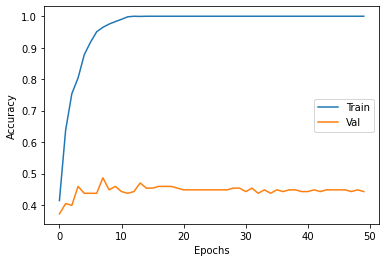

In [29]:
plt.plot(history5['accuracy'], label='Train')
plt.plot(history5['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

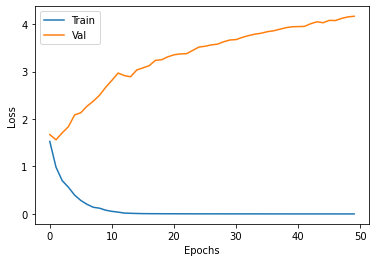

In [31]:
plt.plot(history5['loss'], label='Train')
plt.plot(history5['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Nonostante i modelli 4 e 5 hanno ottenuto buone perfrormance sul test, proviamo ad introdurre delle regolarizzazioni per minimizzare la loss in questi 2 modelli

In [13]:
n_classes = 8
def build_model4_L2():
    n_feature = X_train.shape[1] # numero colonne
    model = Sequential()
    model.add(Dense(512, input_dim=n_feature, activation='relu',kernel_regularizer=l2(0.04)))
    model.add(Dense(512, activation='relu',kernel_regularizer=l2(0.04)))# second layer
    model.add(Dropout(0.05))# between these levels, for each iteration, 10% weight connection are put to 0
    model.add(Dense(n_classes, activation='softmax'))
    # if we have multiclass u have to specify as output the number of classes
    model.compile(loss='sparse_categorical_crossentropy', # compile=build the network. if binary classification use binary_crossentropy as loss fucntions
                  optimizer="adam", metrics=['accuracy']) # metric u want to observe -> typically accuracy,f1 score
    return model

In [14]:
n_classes = 8
def build_model5_L2():
    n_feature = X_train.shape[1] # numero colonne
    model = Sequential()
    model.add(Dense(512, input_dim=n_feature, activation='relu',kernel_regularizer=l2(0.04))) 
    model.add(Dense(n_feature, activation='relu',kernel_regularizer=l2(0.04)))# second layer
    model.add(Dropout(0.05))# between these levels, for each iteration, 10% weight connection are put to 0
    model.add(Dense(n_classes, activation='softmax'))
    # if we have multiclass u have to specify as output the number of classes
    model.compile(loss='sparse_categorical_crossentropy', # compile=build the network. if binary classification use binary_crossentropy as loss fucntions
                  optimizer="adam", metrics=['accuracy']) # metric u want to observe -> typically accuracy,f1 score
    return model

In [15]:
clf4_L2=KerasClassifier(build_fn=build_model4_L2)
clf5_L2=KerasClassifier(build_fn=build_model5_L2)
print("Train Model4_L2")
history4_L2=clf4_L2.fit(X_train, y_train,validation_split=0.1,epochs=50, batch_size=500).history_
print("Train Model5_L2")
history5_L2=clf5_L2.fit(X_train, y_train,validation_split=0.1,epochs=50, batch_size=500).history_

Train Model4_L2
Epoch 1/50


d:\Anaconda\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


4/4 [==============================] - 1s 45ms/step - loss: 34.9770 - accuracy: 0.2219 - val_loss: 31.7985 - val_accuracy: 0.2568
Epoch 2/50
4/4 [==============================] - 0s 13ms/step - loss: 30.4126 - accuracy: 0.4261 - val_loss: 27.6788 - val_accuracy: 0.2951
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 26.3851 - accuracy: 0.4778 - val_loss: 23.9664 - val_accuracy: 0.3661
Epoch 4/50
4/4 [==============================] - 0s 12ms/step - loss: 22.7617 - accuracy: 0.5258 - val_loss: 20.6541 - val_accuracy: 0.3934
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 19.5474 - accuracy: 0.5465 - val_loss: 17.7472 - val_accuracy: 0.3880
Epoch 6/50
4/4 [==============================] - 0s 11ms/step - loss: 16.7161 - accuracy: 0.5647 - val_loss: 15.1829 - val_accuracy: 0.4208
Epoch 7/50
4/4 [==============================] - 0s 10ms/step - loss: 14.2561 - accuracy: 0.5872 - val_loss: 12.9666 - val_accuracy: 0.4208
Epoch 8/50
4/4 [========

d:\Anaconda\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


4/4 [==============================] - 1s 41ms/step - loss: 28.4284 - accuracy: 0.2225 - val_loss: 26.0938 - val_accuracy: 0.3333
Epoch 2/50
4/4 [==============================] - 0s 8ms/step - loss: 25.0797 - accuracy: 0.3964 - val_loss: 23.0757 - val_accuracy: 0.4044
Epoch 3/50
4/4 [==============================] - 0s 10ms/step - loss: 22.1036 - accuracy: 0.4729 - val_loss: 20.3490 - val_accuracy: 0.4098
Epoch 4/50
4/4 [==============================] - 0s 10ms/step - loss: 19.4021 - accuracy: 0.5277 - val_loss: 17.8657 - val_accuracy: 0.4317
Epoch 5/50
4/4 [==============================] - 0s 10ms/step - loss: 16.9685 - accuracy: 0.5587 - val_loss: 15.6247 - val_accuracy: 0.4590
Epoch 6/50
4/4 [==============================] - 0s 11ms/step - loss: 14.8014 - accuracy: 0.5647 - val_loss: 13.6559 - val_accuracy: 0.4426
Epoch 7/50
4/4 [==============================] - 0s 9ms/step - loss: 12.8720 - accuracy: 0.5903 - val_loss: 11.9003 - val_accuracy: 0.4208
Epoch 8/50
4/4 [==========

In [16]:
y_pred4_L2=clf4_L2.predict(X_test).astype(int)
print(classification_report(y_test, y_pred4_L2))

20/20 [==============================] - 0s 632us/step
              precision    recall  f1-score   support

           0       0.51      0.80      0.62        96
           1       0.56      0.59      0.58        96
           2       0.45      0.56      0.50        48
           3       0.63      0.39      0.48        96
           4       0.45      0.45      0.45        96
           5       0.49      0.38      0.42        48
           6       0.41      0.35      0.38        96
           7       0.53      0.40      0.45        48

    accuracy                           0.50       624
   macro avg       0.50      0.49      0.49       624
weighted avg       0.51      0.50      0.49       624



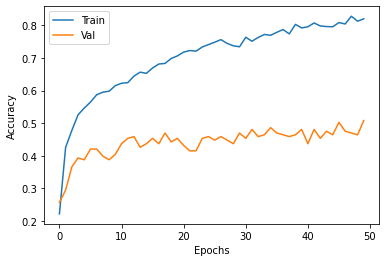

In [17]:
plt.plot(history4_L2['accuracy'], label='Train')
plt.plot(history4_L2['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

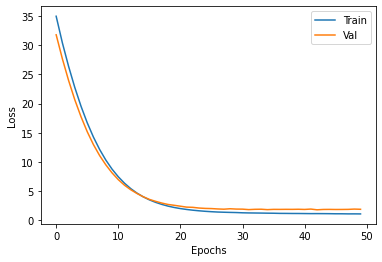

In [18]:
plt.plot(history4_L2['loss'], label='Train')
plt.plot(history4_L2['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
y_pred5_L2=clf5_L2.predict(X_test).astype(int)
print(classification_report(y_test, y_pred5_L2))

20/20 [==============================] - 0s 579us/step
              precision    recall  f1-score   support

           0       0.50      0.78      0.61        96
           1       0.55      0.61      0.58        96
           2       0.49      0.44      0.46        48
           3       0.65      0.36      0.47        96
           4       0.40      0.47      0.43        96
           5       0.49      0.35      0.41        48
           6       0.39      0.31      0.35        96
           7       0.55      0.50      0.52        48

    accuracy                           0.49       624
   macro avg       0.50      0.48      0.48       624
weighted avg       0.50      0.49      0.48       624



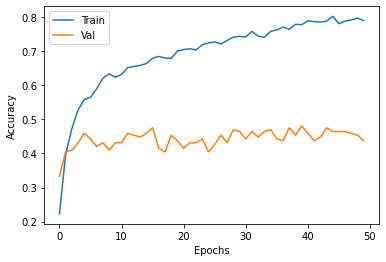

In [20]:
plt.plot(history5_L2['accuracy'], label='Train')
plt.plot(history5_L2['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

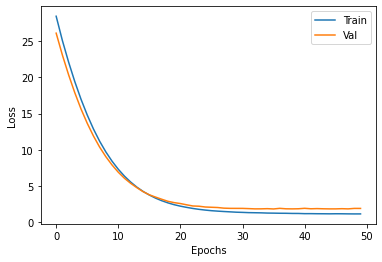

In [21]:
plt.plot(history5_L2['loss'], label='Train')
plt.plot(history5_L2['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()